In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
x = pd.read_csv("/gdrive/MyDrive/Covid Prediction AI Project/X.csv")
y = pd.read_csv("/gdrive/MyDrive/Covid Prediction AI Project/Y.csv")

In [ ]:
x.head()

,Unnamed: 0,cough,fever,sore_throat,shortness_of_breath,head_ache,Female,Male,Age above 60,Abroad,Contact with confirmed
0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0
2,2,0,1,0,0,0,0,1,0,0,0
3,3,1,0,0,0,0,1,0,0,0,0
4,4,1,0,0,0,0,0,1,0,0,0


In [ ]:
y.head()

,Unnamed: 0,Result
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
x.drop(columns=['Unnamed: 0'], inplace=True)
y.drop(columns=['Unnamed: 0'], inplace=True)

## Splitting the Dataset into Training, Validation and Testing Data.

In [ ]:
covid_df = pd.concat([x,y],axis=1)
covid_df

,cough,fever,sore_throat,shortness_of_breath,head_ache,Female,Male,Age above 60,Abroad,Contact with confirmed,Result
0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
520011,1,0,0,0,0,0,1,0,0,1,1
520012,1,0,0,0,1,1,0,0,0,0,1
520013,0,0,0,0,0,0,1,0,0,0,1
520014,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
train_df,valid_df = train_test_split(covid_df,test_size=0.20,random_state=1)
train_df,test_df = train_test_split(train_df,test_size=0.10,random_state=1)

In [ ]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(374410, 11)
(104004, 11)
(41602, 11)


In [ ]:
train_df = train_df.reset_index()
valid_df = valid_df.reset_index()
test_df = test_df.reset_index()

In [ ]:
train_df.drop(columns=['index'],inplace=True)
valid_df.drop(columns=['index'],inplace=True)
test_df.drop(columns=['index'],inplace=True)

In [ ]:
independent_cols = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
                    'Female', 'Male', 'Age above 60', 'Abroad', 'Contact with confirmed']

target_col = ['Result']


In [ ]:
x_train = train_df[independent_cols].copy()
y_train = train_df[target_col].copy()

x_valid = valid_df[independent_cols].copy()
y_valid = valid_df[target_col].copy()

x_test = test_df[independent_cols].copy()
y_test = test_df[target_col].copy()

## Model Building

In [ ]:
# 1. Model Building - Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)

# prediction for validation dataset
y_pred_lr = lr.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score is :  0.8377370101149956
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[48430  3633]
 [13243 38698]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.79      0.93      0.85     52063
           1       0.91      0.75      0.82     51941

    accuracy                           0.84    104004
   macro avg       0.85      0.84      0.84    104004
weighted avg       0.85      0.84      0.84    104004



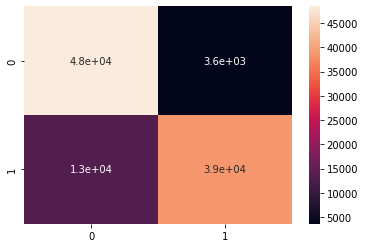

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_lr)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_lr)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_lr)
print("The Classification Report\n",clf_rep)

In [ ]:
# 2. Model Building - Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# prediction for validation dataset
y_pred_dtc = dtc.predict(x_valid)

The accuracy score is :  0.8529095034806353
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[47346  4717]
 [10581 41360]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     52063
           1       0.90      0.80      0.84     51941

    accuracy                           0.85    104004
   macro avg       0.86      0.85      0.85    104004
weighted avg       0.86      0.85      0.85    104004



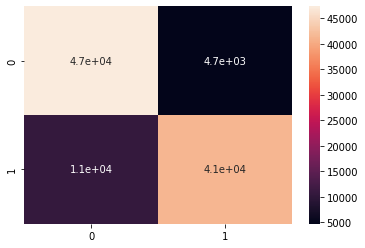

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_dtc)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_dtc)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_dtc)
print("The Classification Report\n",clf_rep)

In [ ]:
# 3. Model Building - RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# prediction for validation dataset
y_pred_rf = rf.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy score is :  0.8528998884658282
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[47345  4718]
 [10581 41360]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     52063
           1       0.90      0.80      0.84     51941

    accuracy                           0.85    104004
   macro avg       0.86      0.85      0.85    104004
weighted avg       0.86      0.85      0.85    104004



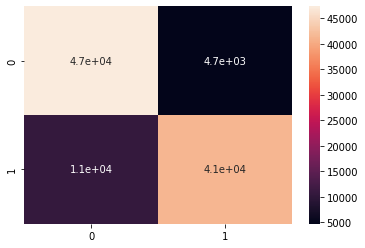

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_rf)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_rf)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_rf)
print("The Classification Report\n",clf_rep)

In [ ]:
# 4. Model Building - Adaboost Classifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

# prediction for validation dataset
y_pred_ada = ada.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score is :  0.8385254413291796
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[48428  3635]
 [13159 38782]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.79      0.93      0.85     52063
           1       0.91      0.75      0.82     51941

    accuracy                           0.84    104004
   macro avg       0.85      0.84      0.84    104004
weighted avg       0.85      0.84      0.84    104004



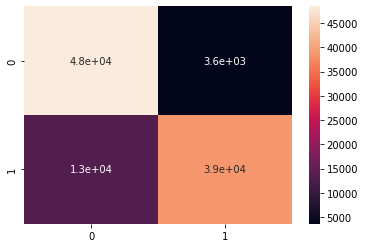

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_ada)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_ada)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_ada)
print("The Classification Report\n",clf_rep)

In [ ]:
# 5. Model Building - KNearest Neighbour Classifier
kneigh = KNeighborsClassifier()
kneigh.fit(x_train,y_train)

# prediction for validation dataset
y_pred_kneigh = kneigh.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy score is :  0.8425733625629783
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[46885  5178]
 [11195 40746]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85     52063
           1       0.89      0.78      0.83     51941

    accuracy                           0.84    104004
   macro avg       0.85      0.84      0.84    104004
weighted avg       0.85      0.84      0.84    104004



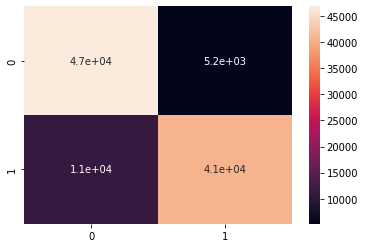

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_kneigh)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_kneigh)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_kneigh)
print("The Classification Report\n",clf_rep)

In [ ]:
# 6. Model Building - XgBoost Classifier
xgb = xgboost.XGBClassifier()
xgb.fit(x_train,y_train)

# prediction for validation dataset
y_pred_xgb = xgb.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score is :  0.8497942386831275
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[48108  3955]
 [11667 40274]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     52063
           1       0.91      0.78      0.84     51941

    accuracy                           0.85    104004
   macro avg       0.86      0.85      0.85    104004
weighted avg       0.86      0.85      0.85    104004



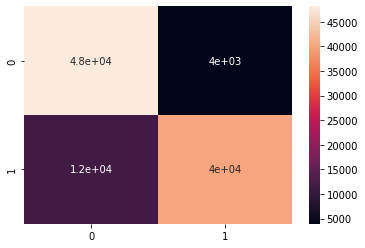

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_xgb)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_xgb)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_xgb)
print("The Classification Report\n",clf_rep)

In [ ]:
# 7. Model Building - Support Vector Classifier
svc = SVC()
svc.fit(x_train,y_train)

# prediction for validation dataset
y_pred_svc = svc.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score is :  0.8526787431252644
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[47265  4798]
 [10524 41417]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     52063
           1       0.90      0.80      0.84     51941

    accuracy                           0.85    104004
   macro avg       0.86      0.85      0.85    104004
weighted avg       0.86      0.85      0.85    104004



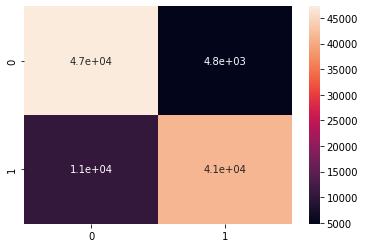

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_svc)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_svc)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_svc)
print("The Classification Report\n",clf_rep)

In [ ]:
# 8. Model Building - Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

# prediction for validation dataset
y_pred_gbc = gbc.predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy score is :  0.8496019383869852
-----------------------------------------------------------------------------------
The Confusion Matrix : 
 [[47926  4137]
 [11505 40436]]
-----------------------------------------------------------------------------------
The Classification Report
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     52063
           1       0.91      0.78      0.84     51941

    accuracy                           0.85    104004
   macro avg       0.86      0.85      0.85    104004
weighted avg       0.86      0.85      0.85    104004



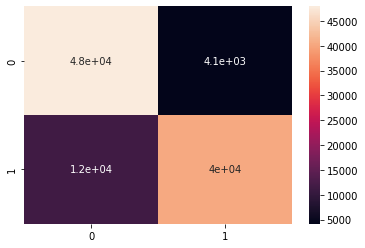

In [ ]:
# Evaluating the model using the classification metrics
# 1. Accuracy Score
accu_score = accuracy_score(y_valid,y_pred_gbc)
print("The accuracy score is : ",accu_score)
print("-----------------------------------------------------------------------------------")

# 2. Confusion Matrix
cf_mat = confusion_matrix(y_valid,y_pred_gbc)
print("The Confusion Matrix : \n",cf_mat)
sns.heatmap(cf_mat,annot=True);
print("-----------------------------------------------------------------------------------")

# 3. Classification Report
clf_rep = classification_report(y_valid,y_pred_gbc)
print("The Classification Report\n",clf_rep)

## Evaluating Model using Stratified K-Fold Cross Validation Method

In [ ]:
# 1. stratified cross validation using logistic regression
skfold=StratifiedKFold(n_splits=5)
model=LogisticRegression()
scores=cross_val_score(model,x,y,cv=skfold)
print("The Cross val score : ", np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The Cross val score :  0.8333570210880513


In [ ]:
# 2. stratified cross validation using decision tree classifier
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,x,y,cv=skfold)
print("The Cross val score : ", np.mean(scores))

The Cross val score :  0.8489507772417492


In [ ]:
# 3. stratified cross validation using random forest classifier
skfold=StratifiedKFold(n_splits=5)
model=RandomForestClassifier()
scores=cross_val_score(model,x,y,cv=skfold)
print("The Cross val score : ", np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

The Cross val score :  0.8490488513357656


In [ ]:
# 4. stratified cross validation using adaboost classifier
skfold=StratifiedKFold(n_splits=5)
model=AdaBoostClassifier()
scores=cross_val_score(model,x,y,cv=skfold)
print("The Cross val score : ", np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The Cross val score :  0.8330454919087782


In [ ]:
# 5. stratified cross validation using KNeigherest Neighbour
skfold=StratifiedKFold(n_splits=5)
model=KNeighborsClassifier()
scores=cross_val_score(model,x,y,cv=skfold)
print("The Cross val score : ", np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

The Cross val score :  0.7926622347985502


In [ ]:
# 6. stratified cross validation using xgboost
skfold=StratifiedKFold(n_splits=5)
model=xgboost.XGBClassifier()
scores=cross_val_score(model,x,y,cv=skfold)
print("The Cross val score : ", np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Cross val score :  0.8485450208988763


In [ ]:
# 7. stratified cross validation using gradient boosting classifier
skfold=StratifiedKFold(n_splits=5)
model=GradientBoostingClassifier()
scores=cross_val_score(model,x,y,cv=skfold)
print("The Cross val score : ", np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

The Cross val score :  0.8478988858761369


## Selecting the Best Model - RandomForest Classifier
- From the above different ML models, I select **RandomForest Classifier** model as the **best model** because:
  - It has high accuracy score of **0.85.**
  - It has high recall values of **0.91** for **class 0** and **0.80** for **class 1.**
  - It has high cross validation score of **0.849**.

           